# Introduction

I will assume the knowledge acquired from the 1st semester course by Rozza and Heltai.

Good free book on Scientific Computing with Python:

https://link.springer.com/book/10.1007/978-3-030-50356-7



# Python for Scientific Computing: quick recap

**Why Python?**

    Python is a modern, general-purpose, object-oriented, high-level programming language with huge community of users

* No license costs. Immediately available (no installation required) from cloud computing platforms, eg. Google [Colab](https://colab.research.google.com)
  * You'll need a Google account to access Google colab

* Extensive ecosystem of scientific libraries (modules):
  * [numpy](https://www.numpy.org) - Numerical Python
  * [scipy](https://www.scipy.org) -  Scientific Python
  * [matplotlib](https://www.matplotlib.org) - graphics library
  * [petsc4py](https://gitlab.com/petsc/petsc) & [slepc4py](https://gitlab.com/slepc/slepc) - vast range of sequential or parallel linear or nonlinear solvers, time stepping, optimization, and eigensolvers
  * [FEniCS](https://www.fenicsproject.org/) & [Firedrake](https://www.firedrakeproject.org) - finite element method (FEM) platforms.

You can get this colab notebook by typing the line:

**!git clone https://github.com/andreacangiani/NSPDE-ANA2023.git**

**Modules**

In [1]:
import math

Import just what you need...

In [2]:
from math import sin, pi



**Variables**
Convention: variable names start with a lower-case letter (Class names start with a capital letter).

**Operators**

* Arithmetic operators:
    `+`, `-`, `*`, `/`, `//` (integer division), `**` power

* Boolean operators:
    `and`, `not`, `or`

* Comparison operators:
    `>`, `<`, `>=` (greater or equal), `<=` (less or equal), `==` equal, `!=` not equal.

In [3]:
print(2**3)

8


In [4]:
my_bool = True and False

my_string = "Can something be true and false at the same time???  "

print(my_string, my_bool)

Can something be true and false at the same time???   False


In [5]:
3 >= 2

True

In [6]:
statement1 = (3 <= 2)
statement2 = (0 == 1)

# Note! Indentation based!
if statement1:
    print("statement1 is True")
elif statement2:
    print("statement2 is True")
else:
    print("statement1 and statement2 are both False")

statement1 and statement2 are both False


**Lists**

In [7]:
my_list = [1, 2, 3, 4, 5, "a"]



In [8]:
my_nested_list = [[1, 2], [3, 4, 5]]



Turning lists into NumPy arrays

In [9]:
import numpy as np # module for arrays


**"for" and and "while" loops**

In [10]:
i = 0
while i < 3:
    print(i)
    i += 1

print("is identical to")

v = [0, 1, 2, 3]
i = 0
while i<len(v)-1:
  print(v[i])
  i = i + 1

0
1
2
is identical to
0
1
2


**Functions**

In [11]:
def mult(f1,f2):
  # returns product of arguments
  return f1*f2

print(mult(2,3))

6


In [12]:
def powers (x,p=2):
  # returns given power
  # default is p=2
  return x**p

print(powers(2))
print(powers(2,3))

4
8


Function implementing:
$$
f(x)=
\left\{
\begin{array}{l}
0,\quad x<0\\
x,\quad 0\le x<1\\
2-x,\quad 1\le x<2\\
0,\quad x\ge 2
\end{array}
\right.
$$

In [13]:
def f(x):
  if x < 0:
    return 0
  elif 0 <= x < 1:
    return x
  elif 1 <= x < 2:
    return 2 - x
  elif x >= 2:
    return 0

In [14]:
f(3)

0

Lambda functions are one-line functions:

In [15]:
f=lambda x,y,z: x**2+y-z
print(f(1,1,8))

-6


# Divided Difference formulas

Implement basic divided difference formulas:

$\delta_{h,+} f (x)= \frac{f(x+h)-f(x)}{h}  \quad$    (FD)

$\delta_{h,-} f (x)= \frac{f(x)-f(x-h)}{h}  \quad$    (BD)

$\delta_{h} f (x)= \frac{f(x+h/2)-f(x-h/2)}{h}  \quad$    (CD)

In [16]:
import matplotlib
#pylap inline
import sympy as sym

In [17]:
def back_diff(x,h,f):
    return (f(x)-f(x-h))/h

In [18]:
t = sym.var('t')
fsym = 0.5 * t**2
fdsym = fsym.diff(t, 1)

f = sym.lambdify(t, fsym)
fd = sym.lambdify(t, fdsym)

x = 0.5
print(fd(x))

0.5


In [19]:
h=0.1
print(back_diff(x,h,f))

0.44999999999999984


check rate of convergence

In [20]:
nexp=8
error=np.zeros(nexp)

for i in range(nexp):
    n = 2**(i+1)
    h=1/n
    bd= back_diff(x,h,f)
    error[i]=abs(fd(x)-bd)

print(error)

print(np.log(error[1:nexp]/error[0:nexp-1])/np.log(2))

[0.25       0.125      0.0625     0.03125    0.015625   0.0078125
 0.00390625 0.00195312]
[-1. -1. -1. -1. -1. -1. -1.]


Let us now fix a grid and compute the FD in matrix form

In [21]:
a=0
b=1
n=5
h=(b-a)/n

x= np.linspace(a,b,n+1)
print(x)

[0.  0.2 0.4 0.6 0.8 1. ]


In [22]:
fd=np.zeros((n+1,n+1))
for i in range(n):
    fd[i,i]=-1
    fd[i,i+1]=1

fd=fd/h

In [23]:
print(fd)

[[-5.  5.  0.  0.  0.  0.]
 [ 0. -5.  5.  0.  0.  0.]
 [ 0.  0. -5.  5.  0.  0.]
 [ 0.  0.  0. -5.  5.  0.]
 [ 0.  0.  0.  0. -5.  5.]
 [ 0.  0.  0.  0.  0.  0.]]


In [24]:
u=f(x)

u_x=fd.dot(u)[0:n]

In [25]:
print(x[0:n])
print(u_x)

[0.  0.2 0.4 0.6 0.8]
[0.1 0.3 0.5 0.7 0.9]


Let's check convergence!

In [26]:
def fd(a,b,n):
    h=(b-a)/n
    fd=np.zeros((n+1,n+1))

    for i in range(n):
        fd[i,i]=-1
        fd[i,i+1]=1

    return fd/h

In [27]:
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_x = sym.lambdify(t, my_f.diff(t,1))

a = 0
b = 2 * np.pi

error = np.zeros(8)
nn = np.zeros(8)

for i in range(8):
  n = 2**(i+1)
  nn[i] = n
  x=np.linspace(a,b,n+1)
  fd_mat = fd(a,b,n)
  u_x=fd_mat.dot(fsym(x))[1:n]
  error[i]=max(abs(u_x-fsym_x(x)[1:n]))

Print error

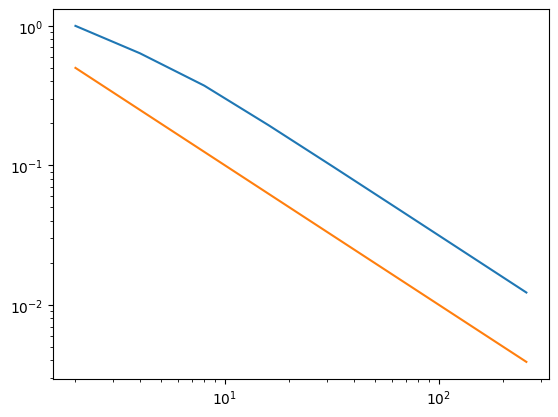

In [28]:
import matplotlib.pyplot

matplotlib.pyplot.loglog(nn,error)

matplotlib.pyplot.loglog(nn,nn**(-1))



Exercise 1 Implement the BD and CD formulas in matrix form as done for the FD forumla. Display in the same plot the error obtained with all three formulas to verify the theoretical order of convergence.

Exercise 2 Look up in Chapter 3 of the typed lecture notes NSPDE.pdf the one-sided second order formulas for the approximation of first derivatives. Implement these formulas. Compare these formulas with the CD formula by plotting errors as before in a single loglog plot. Comment your results.

Exercise 3 Repeat Exercise 2 this time considering the centred and one sided formulas for the approximation of the second derivative also found in the lecture notes.


In [29]:
def bd(a, b, n):
    h=(b-a)/n
    bd=np.zeros((n+1, n+1))

    for i in range(n):
        bd[i,i]=1
        if i>0:
            bd[i,i-1]=-1

    return bd/h

In [30]:
def cd(a, b, n):
    h=(b-a)/n
    cd=np.zeros((n+1, n+1))

    for i in range(n):
        cd[i,i]=0
        cd[i,i+1]=1
        if i>0:
            cd[i,i-1]=-1

    return cd/(2*h)

In [31]:
t=sym.var('t')
my_f=sym.sin(t)
fsym=sym.lambdify(t,my_f)
fsym_x=sym.lambdify(t, my_f.diff(t,1))

a= 0
b= 2*np.pi

#Define the number of experiments and arrays to store results
no_expe=8
error_fd=np.zeros(no_expe)
error_bd=np.zeros(no_expe)
error_cd=np.zeros(no_expe)
nn=np.zeros(no_expe)

#Loop over different values of n
for i in range(no_expe):
    n = 2**(i+1)
    nn[i] = n
    x= np.linspace(a,b, n+1)
    
    #Backward Difference
    bd_mat=bd(a, b, n)
    u_x_bd=bd_mat.dot(fsym(x))[1:n]
    error_bd[i]=max(abs(u_x_bd - fsym_x(x)[1:n]))
    
    #Central Difference
    cd_mat=cd(a, b,n)
    u_x_cd=cd_mat.dot(fsym(x))[1:n]
    error_cd[i]=max(abs(u_x_cd-fsym_x(x)[1:n]))

    #Forward Difference
    fd_mat=fd(a,b,n)
    u_x_fd=fd_mat.dot(fsym(x))[1:n]
    error_fd[i]=max(abs(u_x_fd-fsym_x(x)[1:n]))

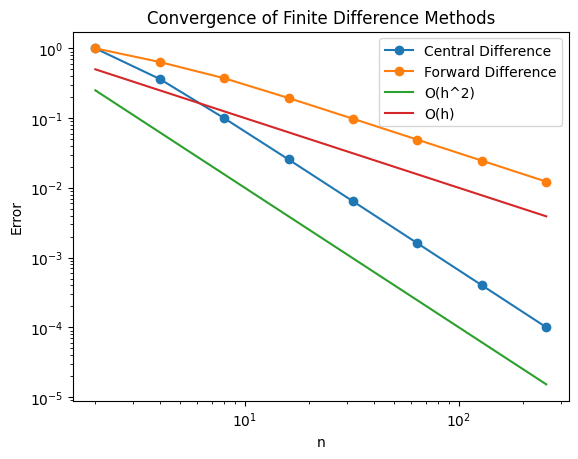

In [32]:
import matplotlib.pyplot as plt
plt.loglog(nn, error_cd, marker='o', label='Central Difference')
plt.loglog(nn, error_fd, marker='o', label='Forward Difference')
matplotlib.pyplot.loglog(nn,nn**(-2), label='O(h^2)')
matplotlib.pyplot.loglog(nn,nn**(-1), label='O(h)')
plt.title('Convergence of Finite Difference Methods')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

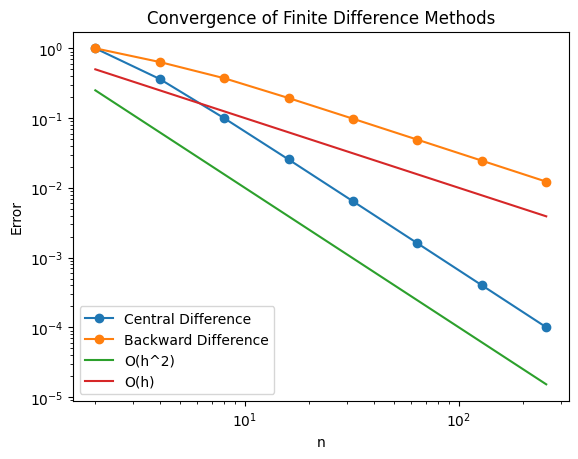

In [33]:
plt.loglog(nn, error_cd, marker='o', label='Central Difference')
plt.loglog(nn, error_bd, marker='o', label='Backward Difference')
matplotlib.pyplot.loglog(nn,nn**(-2), label='O(h^2)')
matplotlib.pyplot.loglog(nn,nn**(-1), label='O(h)')
plt.title('Convergence of Finite Difference Methods')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

Second

In [34]:
def fd2(a,b,n):
  h = (b-a)/n
  fd2 = np.zeros((n+1,n+1))

  for i in range(n-1):
    fd2[i,i]=-3
    fd2[i,i+1]=+4
    fd2[i,i+2]=-1

  return fd2/(2*h)

In [35]:
def bd2(a, b, n):
    h = (b-a)/n
    bd2 = np.zeros((n+1,n+1))

    for i in range(2,n+1):
        bd2[i,i]=3
        bd2[i,i-1]=-4
        bd2[i,i-2]=1

    return bd2/(2*h)


In [36]:
fd2(0,1,2)

array([[-3.,  4., -1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [37]:
bd2(0,1,5)

array([[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ],
       [  2.5, -10. ,   7.5,   0. ,   0. ,   0. ],
       [  0. ,   2.5, -10. ,   7.5,   0. ,   0. ],
       [  0. ,   0. ,   2.5, -10. ,   7.5,   0. ],
       [  0. ,   0. ,   0. ,   2.5, -10. ,   7.5]])

In [38]:
t=sym.var('t')
my_f=sym.sin(t)
fsym=sym.lambdify(t,my_f)
fsym_x=sym.lambdify(t, my_f.diff(t,1))

a=0
b=2*np.pi

#Define the number of experiments and arrays to store results
no_expe=8
error_fd2= np.zeros(no_expe)
error_bd2=np.zeros(no_expe)
error_cd2=np.zeros(no_expe)
nn=np.zeros(no_expe)

#Loop over different values of n
for i in range(no_expe):
    n=2**(i+1)
    nn[i]=n
    x= np.linspace(a,b,n+1)
    
    #Forward 2nd Order
    fd2_mat=fd2(a, b, n)
    u_x_fd2 = fd2_mat@fsym(x)
    error_fd2[i] = max (abs(u_x_fd2[0:n-1]-fsym_x(x)[0:n-1]))
    
    #Backward 2nd Order
    bd2_mat=bd2(a, b, n)
    u_x_bd2 = bd2_mat@fsym(x)
    error_bd2[i] = max (abs(u_x_bd2[2:n+1]-fsym_x(x)[2:n+1]))

    #Central
    cd_mat=cd(a, b, n)
    u_x_cd = cd_mat@fsym(x)
    error_cd[i] = max (abs(u_x_cd[1:n]-fsym_x(x)[1:n]))


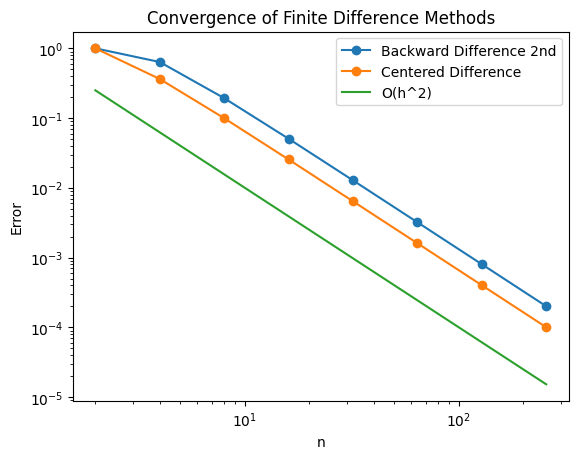

In [39]:
plt.loglog(nn, error_bd2, marker='o', label='Backward Difference 2nd')
plt.loglog(nn, error_cd, marker='o', label='Centered Difference')
plt.loglog(nn, nn**(-2), label='O(h^2)')
plt.title('Convergence of Finite Difference Methods')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

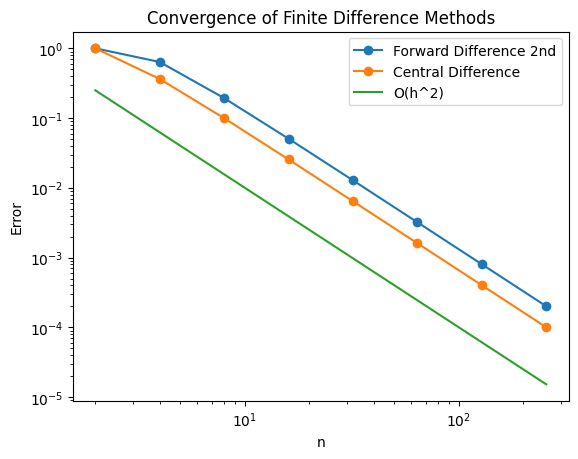

In [40]:
plt.loglog(nn, error_fd2, marker='o', label='Forward Difference 2nd')
plt.loglog(nn, error_cd, marker='o', label='Central Difference')
plt.loglog(nn, nn**(-2), label='O(h^2)')
plt.title('Convergence of Finite Difference Methods')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

As we should expect, the second order backward and forward formulas are more accurate than the first order ones. The order of convergence, as expected is $O(h^2)$.

Third

In [41]:
def cdd(a,b,n):
    h=(b-a)/n
    cdd=np.zeros((n+1,n+1))

    for i in range(1,n):
        cdd[i,i-1]=1
        cdd[i,i]=-2
        cdd[i,i+1]=1

    return cdd/(h**2)

In [42]:
def fdd(a,b,n):
    h=(b-a)/n
    fdd=np.zeros((n+1,n+1))

    for i in range(n-2):
        fdd[i,i]=2
        fdd[i,i+1]=-5
        fdd[i,i+2]=4
        fdd[i,i+3]=-1

    return fdd/(h**2)

In [45]:
def bdd(a,b,n):
    h=(b-a)/n
    bdd=np.zeros((n+1,n+1))

    for i in range(3,n+1):
        bdd[i,i]=2
        bdd[i,i-1]=-5
        bdd[i,i-2]=4
        bdd[i,i-3]=-1

    return bdd/(h**2)

In [46]:
t=sym.var('t')
my_f=sym.sin(t)
fsym=sym.lambdify(t,my_f)
fsym_xx=sym.lambdify(t, my_f.diff(t,2))

a=0
b=1

#Define the number of experiments and arrays to store results
no_expe=8
error_cdd= np.zeros(no_expe)
error_bdd=np.zeros(no_expe)
error_fdd=np.zeros(no_expe)
nn=np.zeros(no_expe)

for i in range(no_expe):
    n=2**(i+1)
    nn[i]=n
    x=np.linspace(a,b,n+1)
    
    # Centered 2nd Order
    cdd_mat=cdd(a, b, n)
    u_xx_cdd=cdd_mat@fsym(x)
    error_cdd[i]=max(abs(u_xx_cdd[1:n]-fsym_xx(x)[1:n]))

    bdd_mat=bdd(a,b,n)
    u_xx_bd2=bdd_mat@fsym(x)

    fdd_mat=fdd(a,b,n)
    u_xx_fd2=fdd_mat@fsym(x)

    if n>2:
        error_bdd[i]=max(abs(u_xx_bd2[3:n+1]-fsym_xx(x)[3:n+1]))
        error_fdd[i]=max(abs(u_xx_fd2[0:n-2]-fsym_xx(x)[0:n-2]))


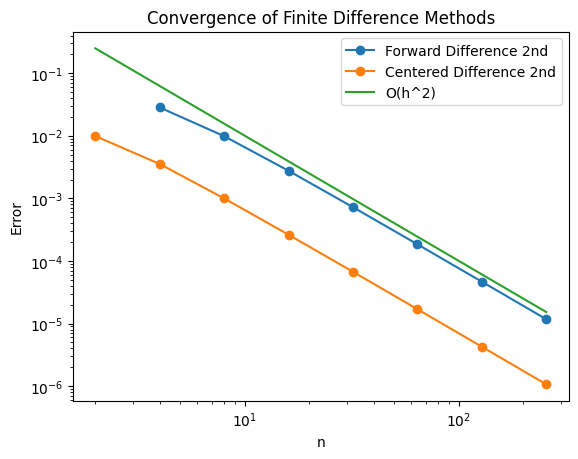

In [49]:
plt.loglog(nn[1:], error_fdd[1:], marker='o', label='Forward Difference 2nd')
plt.loglog(nn, error_cdd, marker='o', label='Centered Difference 2nd')
plt.loglog(nn, nn**(-2), label='O(h^2)')
plt.title('Convergence of Finite Difference Methods')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

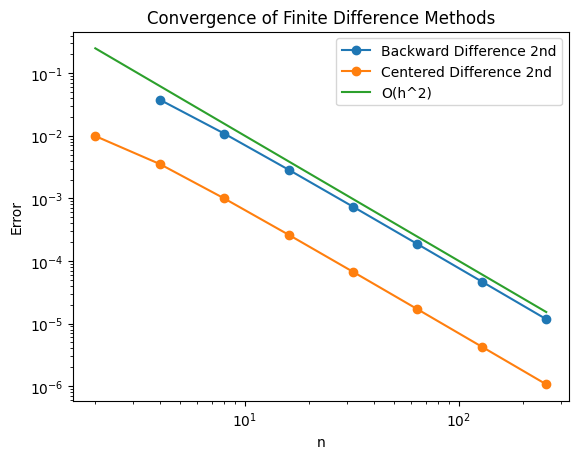

In [50]:
plt.loglog(nn[1:], error_bdd[1:], marker='o', label='Backward Difference 2nd')
plt.loglog(nn, error_cdd, marker='o', label='Centered Difference 2nd')
plt.loglog(nn, nn**(-2), label='O(h^2)')
plt.title('Convergence of Finite Difference Methods')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

Also here, as expected, we get an $O(h^2)$ of convergence. As expected the centered difference are the ones performing better.